Mounted at /content/drive


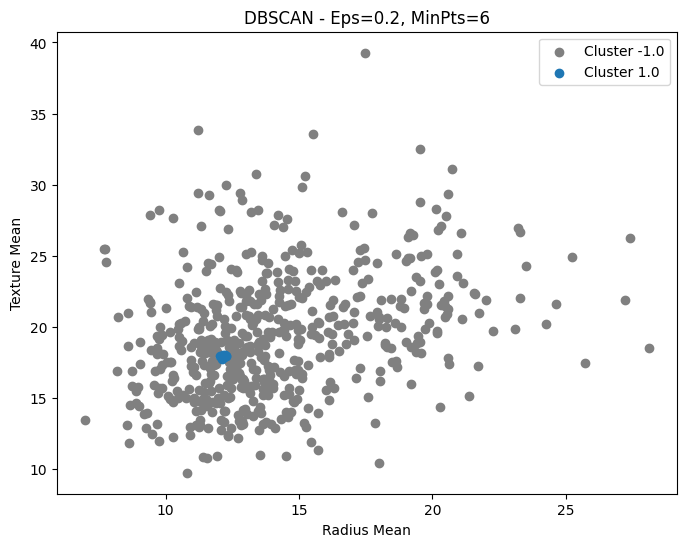

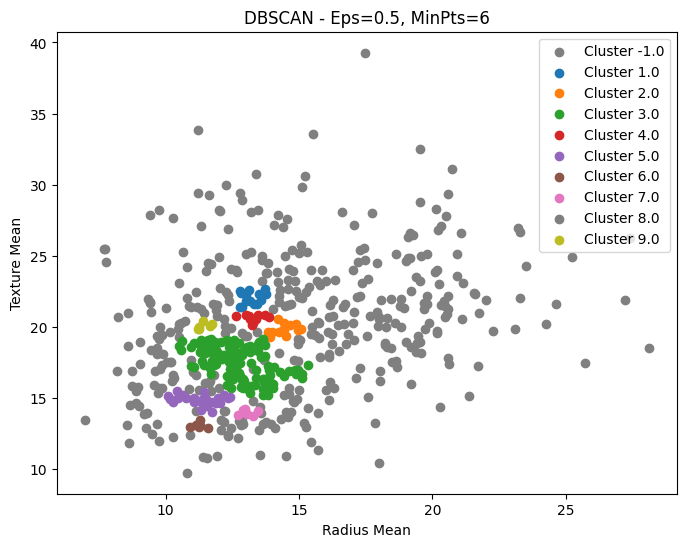

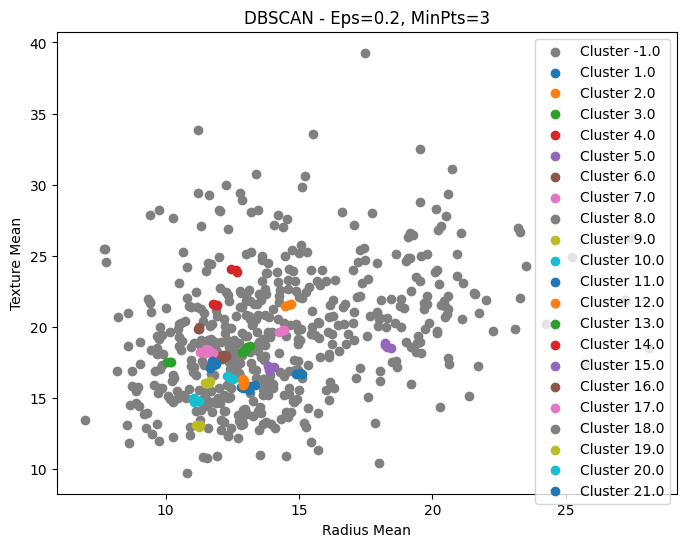

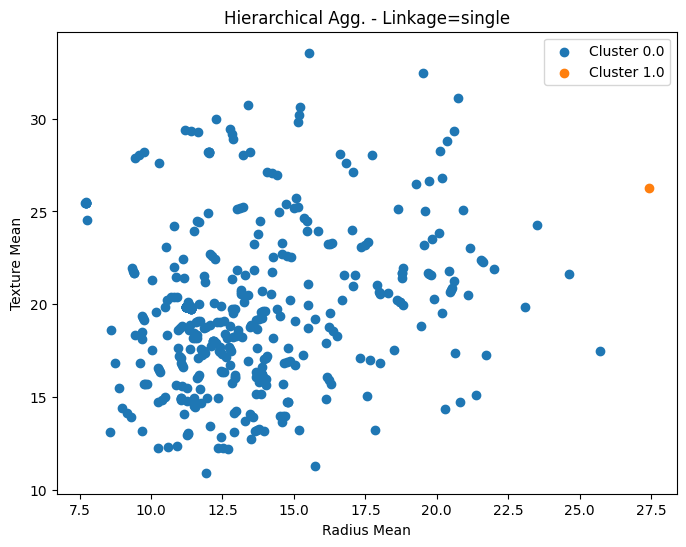

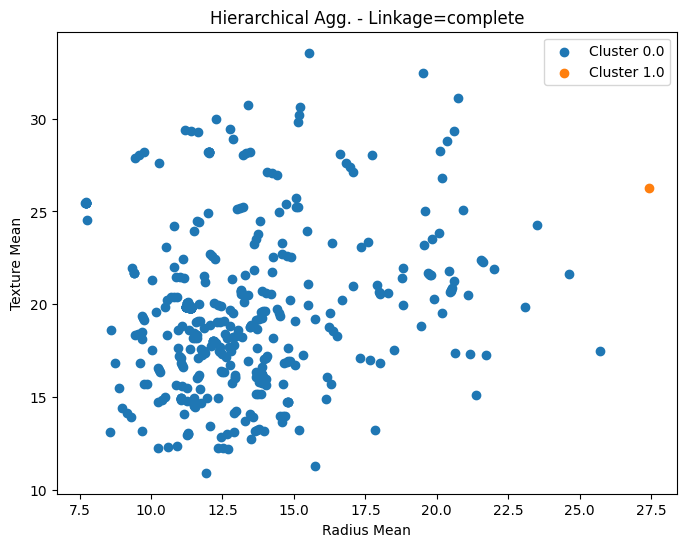

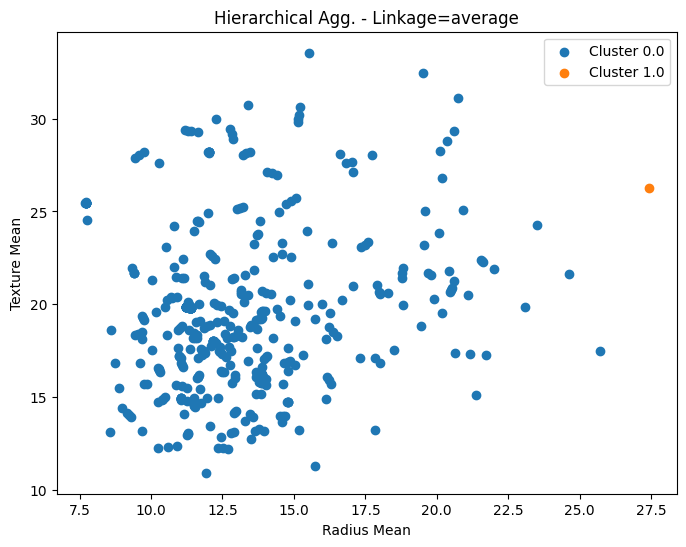

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/cancer.csv')

# Extract relevant columns for clustering
X = df[['radius_mean', 'texture_mean']].values

# Helper function for Euclidean distance
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

# Helper function for DBSCAN
def dbscan(X, eps, minPts):
    labels = np.zeros(len(X))
    cluster = 0

    for i in range(len(X)):
        if labels[i] != 0:
            continue

        neighbors = [j for j in range(len(X)) if euclidean_distance(X[i], X[j]) <= eps]

        if len(neighbors) < minPts:
            labels[i] = -1
        else:
            cluster += 1
            labels[i] = cluster

            for j in neighbors:
                if labels[j] == -1:
                    labels[j] = cluster
                if labels[j] == 0:
                    labels[j] = cluster
                    new_neighbors = [k for k in range(len(X)) if euclidean_distance(X[j], X[k]) <= eps]
                    if len(new_neighbors) >= minPts:
                        neighbors += new_neighbors

    return labels

# Helper function for Hierarchical Agglomerative Clustering
def hierarchical_agglomerative(X, num_clusters):
    n = len(X)
    clusters = [[i] for i in range(n)]
    cluster_centers = X

    while len(clusters) > num_clusters:
        min_dist = float('inf')
        merge_i, merge_j = None, None

        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                for ci in clusters[i]:
                    for cj in clusters[j]:
                        dist = euclidean_distance(X[ci], X[cj])
                        if dist < min_dist:
                            min_dist = dist
                            merge_i, merge_j = i, j

        clusters[merge_i] += clusters[merge_j]
        del clusters[merge_j]

        new_center = np.mean(X[clusters[merge_i]], axis=0)
        cluster_centers[merge_i] = new_center

    labels = np.zeros(n)
    for i, cluster in enumerate(clusters):
        labels[cluster] = i

    return labels

# Perform DBSCAN
eps_values = [0.2, 0.5, 0.2]
minPts_values = [6, 6, 3]

for eps, minPts in zip(eps_values, minPts_values):
    db_labels = dbscan(X, eps, minPts)

    # Plot clusters for DBSCAN
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(db_labels)
    for label in unique_labels:
        if label == -1:
            plt.scatter(X[db_labels == label][:, 0], X[db_labels == label][:, 1], color='grey', label=f'Cluster {label}')
        else:
            plt.scatter(X[db_labels == label][:, 0], X[db_labels == label][:, 1], label=f'Cluster {label}')
    plt.title(f'DBSCAN - Eps={eps}, MinPts={minPts}')
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.legend()
    plt.show()

# Perform Hierarchical Agglomerative Clustering
num_clusters = 2

linkages = ['single', 'complete', 'average']

for linkage in linkages:
    ag_labels = hierarchical_agglomerative(X, num_clusters)

    # Plot clusters for Hierarchical Agglomerative Clustering
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(ag_labels)
    for label in unique_labels:
        plt.scatter(X[ag_labels == label][:, 0], X[ag_labels == label][:, 1], label=f'Cluster {label}')
    plt.title(f'Hierarchical Agg. - Linkage={linkage}')
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.legend()
    plt.show()
